<a href="https://colab.research.google.com/github/OrestisMarantos/AppStat2019/blob/master/Step_Detection_binary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import necessary libraries

In [ ]:
# import tensorflow
print(tensorflow.__version__)
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
# from keras.wrappers.scikit_learn import KerasClassifier
# from sklearn.model_selection import cross_val_score
# from sklearn.preprocessing import LabelEncoder
# from sklearn.model_selection import StratifiedKFold
# from sklearn.preprocessing import StandardScaler
# from sklearn.pipeline import Pipeline
import scipy.io
import numpy as np
# mlp for multi-label classification

# from sklearn.datasets import make_multilabel_classification
# from sklearn.model_selection import RepeatedKFold
# from keras.models import Sequential
# from keras.layers import Dense
from sklearn.metrics import accuracy_score
from sklearn.utils import class_weight
import tensorflow as tf
import tensorflow.keras.backend as K
from sklearn.utils import shuffle
from tensorflow.keras.utils import to_categorical

2.6.0


## Connect with google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Load Classes (labels: 0 or 1)

In [ ]:

Classes = scipy.io.loadmat('drive/MyDrive/NN_Data/Simul_0928/All_classes.mat')


Classes = Classes['All_classes']
# print(np.size(Classes))
# Classes1 = scipy.io.loadmat('drive/MyDrive/NN_Data/Simul_0520_noisysteps_bin5/All_classes.mat')
# Classes1 = Classes1['All_classes']
# print(np.size(Classes1))
# Classes = np.concatenate((Classes, Classes1), axis=0)
print(Classes)
print(np.size(Classes))
# diff3_CK_smooth = scipy.io.loadmat('Data/diff3_CK_smooth.mat')
print(np.shape(Classes))




# Int_abs_max = np.max(np.abs(Intensities))
# print(Int_abs_max)
# Intensities = Intensities / Int_abs_max
# # Max_Intensities = np.max(Intensities,1)
# print(np.shape(Intensities))
# # print(np.size(Max_Intensities))
# # Norm_Intensities = Intensities / Max_Intensities[:,None]
# # print(Norm_Intensities)
# print(Intensities)
# print(Y)

[[0]
 [0]
 [0]
 ...
 [1]
 [1]
 [1]]
11154
(11154, 1)


## Preparing classes for softmax

In [ ]:
# # Classes = to_categorical(Classes)

# Classes_sftmx = np.zeros((Classes.shape[0], 3))
# for i in range(Classes.shape[0]):
#   if Classes[i]==1:
#     Classes_sftmx[i,0] = 1
#   elif Classes[i]==2:
#     Classes_sftmx[i,1] = 1
#   else:
#     Classes_sftmx[i,2] = 1
# Classes = Classes_sftmx

# print(Classes) 

## Load smoothed noisy traces (Chung kennedy)

In [ ]:
# Traces = scipy.io.loadmat('drive/MyDrive/Simul_0518_300Frames_CleanSteps/All_traces_steps.mat')

from scipy.io import matlab
Traces = matlab.loadmat('drive/MyDrive/NN_Data/Simul_0928/All_traces_steps.mat')
Traces = Traces['All_traces_steps']

# Traces1 = scipy.io.loadmat('drive/MyDrive/NN_Data/Simul_0520_noisysteps_bin5/All_traces_steps.mat')
# Traces1 = Traces1['All_traces_steps'] 

# Traces = np.concatenate((Traces, Traces1), axis=0)

print(Traces.shape)
# Traces_max = np.max(Traces)
Min_Traces = np.min(Traces,1)
Traces = Traces / Min_Traces[:,None]
print(Traces)

# print(np.shape(Intensities))
# # print(np.size(Max_Intensities))
# # Norm_Intensities = Intensities / Max_Intensities[:,None]
# print(Traces_max)
# Traces = Traces / np.max(Traces_max)
# print(Traces)

(11154, 900)
[[1.23577948 1.23577948 1.22186013 ... 2.95286115 3.6093975  3.6093975 ]
 [1.20834243 1.20834243 1.28463001 ... 5.18263414 6.00713049 6.00713049]
 [1.20619292 1.20619292 1.22875773 ... 5.40301178 5.40573964 5.40573964]
 ...
 [1.12522664 1.12522664 1.18478407 ... 4.66818849 4.70643816 4.70643816]
 [1.12693298 1.12693298 1.12767459 ... 1.92046379 1.91087993 1.91087993]
 [1.         1.         1.22804132 ... 5.55092144 6.00970998 6.00970998]]


## Load Derivatives of smoothed noisy traces

In [ ]:
Traces_deriv = scipy.io.loadmat('drive/MyDrive/NN_Data/Simul_0928/derivat.mat')
Traces_deriv = Traces_deriv['derivat'] 
print(Traces_deriv.shape[0])

# Traces_deriv1 = scipy.io.loadmat('drive/MyDrive/NN_Data/Simul_0520_noisysteps_bin5/derivat.mat')
# Traces_deriv1 = Traces_deriv1['derivat'] 
# print(Traces_deriv1.shape[0])
# Traces_deriv = np.concatenate((Traces_deriv, Traces_deriv1), axis=0)
# print(Traces_deriv)
# print(Traces_deriv.shape)
# Traces_deriv_max = np.max(np.abs(Traces_deriv),1)
# print(Traces_deriv_max)
# Traces_deriv = Traces_deriv / Traces_deriv_max[:,None]

#print(Traces_deriv)
print(Traces_deriv.shape)

11154
(11154, 900)


## Random Suffling of samples

In [ ]:
# randomly shuffle vesicles and their traces, derivatives and classes, all in the same way
p = np.random.permutation(Classes.shape[0])


Classes = Classes[p]
Traces = Traces[p]
Traces_deriv = Traces_deriv[p]
print(Traces)

[[1.06155153 1.06155153 1.09701497 ... 2.68794467 2.65467285 2.65467285]
 [1.         1.         1.23085168 ... 2.63422093 2.33729434 2.33729434]
 [1.         1.         1.27533842 ... 1.54336501 1.57364091 1.57364091]
 ...
 [1.         1.         1.20793156 ... 2.7930485  2.62844888 2.62844888]
 [1.08837539 1.08837539 1.171774   ... 4.16911806 4.20619338 4.20619338]
 [1.         1.         1.12683396 ... 8.14010822 8.76373842 8.76373842]]


## Combine Traces and Derivatives (2 features)

In [ ]:
Combo = np.zeros((Traces.shape[0],Traces.shape[1],2))
print(Combo.shape)
Combo[:,:,0] = Traces_deriv
Combo[:,:,1] = Traces
Traces = Traces_deriv

(11154, 900, 2)


## Separation on Train and Test data

In [ ]:
XTrain = Traces[:9000,:]
YTrain = Classes[:9000,:]

XTest = Traces[9000:,:]
YTest = Classes[9000:,:]
from sklearn.utils.multiclass import type_of_target
print(np.shape(XTest))
print(np.shape(YTest))
print(type_of_target(YTrain))
print(np.unique(YTrain))

(2154, 900)
(2154, 1)
binary
[0 1]


In [ ]:
Train_samples = XTrain.shape[0]
Test_samples = XTest.shape[0]
timesteps = XTrain.shape[1]
print(timesteps)
print(Train_samples)

900
9000


## LSTMS require data to be introduced in a 3 dimentional way. (samples, timesteps, features)

In [ ]:
XTrain = XTrain.reshape(Train_samples,timesteps,1)
# YTrain = YTrain.reshape(Train_samples,YTrain.shape[1],1)
print(XTrain.shape, YTrain.shape)

XTest = XTest.reshape(Test_samples,timesteps,1)
# YTest = YTest.reshape(Test_samples,YTrain.shape[1],1)
print(XTest.shape, YTest.shape)

(9000, 900, 1) (9000, 1)
(2154, 900, 1) (2154, 1)


## Develop a Bi-directional LSTM, set parameters

In [ ]:
import keras.backend as K
import tensorflow as tf
from tensorflow.keras.layers import LSTM
from tensorflow import keras
from keras.layers import Dropout
from tensorflow.python.keras.layers import (Activation, BatchNormalization, Bidirectional, Conv1D, CuDNNLSTM, Dense,
                                            Dropout, LSTM, Lambda, MaxPooling1D, TimeDistributed, add)

n_timesteps = 900
n_features = 1
n_neurons = 900
n_outputs = 1
batch_size = 100
# n_classes = 2
# batch_size = 100
# n_epochs = 10

callbacks = [
    # COMMENT: If the val_loss gets smaller than a specific value then the training terminates and the machine learning algorithm is saved
    # keras.callbacks.ModelCheckpoint(
    #     "best_model.h5", save_best_only=True, monitor="val_loss"
    # ),
    # COMMENT: when reaching a plateau the learning rate reduces in each epoch by a factor of 0.5. If after patience number of epochs there is not difference in val_loss the learning terminates.
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=7, min_lr=0.000001
    ),
    # COMMENT: the algorithm stops in patience steps if there is no val_loss difference.
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=15, verbose=1),
]


# COMMENT: A Bidirectional LSTM model for trace classification. 
# ARGUMENTS: n_timesteps: number of steps in the time series, n_features: number of variables for each timeseries (In this case we have the intensity values and its derivative thus 2 features)
# ARGUMENTS: n_neurons: number of nodes for the hidden layer, n_outputs: the number of values in the end (in this case we have 1 outuput, each trace is either 0 either 1), batch_size: The number of traces (subsample) the network optimizes simultaneously, this number needs to divide perfectly the total number of traces.
def get_model(n_timesteps, n_features, n_neurons, n_outputs, batch_size):
  
  # COMMENT: A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.
  model = Sequential()

  # COMMENT: A Bidirectional layer is two LSTM networks which run in the opposite direction. The output number is equal to the addition of the ipnut number for each LSTM.
  # model.add(LSTM(300, input_shape=(n_timesteps,n_features)))
  model.add(Bidirectional(LSTM(400), input_shape=(n_timesteps, 1) ))
  
  # COMMENT: The network do not get information from 50% of the nodes of the previous layer. In that way we avoid overfitting.
  model.add(Dropout(0.5))

  # COMMENT: A dense layer with a Relu activation function which keeps only positive values to give to the final layer which uses a sigmoid to predict a 0 or 1 value for the classification.
  model.add(Dense(600, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  
  model.build(input_shape=(batch_size,n_timesteps, 1))
  
  # COMMENT: Shows a summary of the networks details
  model.summary()

  # COMMENT: Compile the model and use a loss function to minimize the error in each epoch with the use of an optimizer and a metrics function.
  model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics = ['acc'])
  
  return model


print(XTrain.shape)
model = get_model(n_timesteps, n_features, n_neurons, n_outputs, batch_size)
model

# A percentage of test data is used for validation of the training process.
history = model.fit(XTrain, YTrain, verbose=1, epochs=15, batch_size=100, validation_split=0.2,callbacks=callbacks)

# The accuracy of the model is been tested with the use of test data.
_, accuracy = model.evaluate(XTest, YTest, batch_size=100, verbose=1)

(9000, 900, 1)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper (ModuleWrappe (100, 800)                1286400   
_________________________________________________________________
module_wrapper_1 (ModuleWrap (100, 800)                0         
_________________________________________________________________
module_wrapper_2 (ModuleWrap (100, 600)                480600    
_________________________________________________________________
module_wrapper_3 (ModuleWrap (100, 1)                  601       
Total params: 1,767,601
Trainable params: 1,767,601
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
72/72 [==============================] - 285s 4s/step - loss: 0.5929 - acc: 0.6897 - val_loss: 0.5081 - val_acc: 0.7572
Epoch 2/15
72/72 [==============================] - 281s 4s/step - loss: 0.3783 - acc: 0.8353 - va

In [ ]:
test_loss, test_acc = model.evaluate(XTest[:2200,:], YTest[:2200,:], batch_size=100, verbose=1)
print("Test accuracy", test_acc)
print("Test loss", test_loss)

22/22 [==============================] - 23s 1s/step - loss: 0.0971 - acc: 0.9698
Test accuracy 0.9698235988616943
Test loss 0.09710901975631714


## Graph which shows training and validation data ( if they dont agree then we have an overfit)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


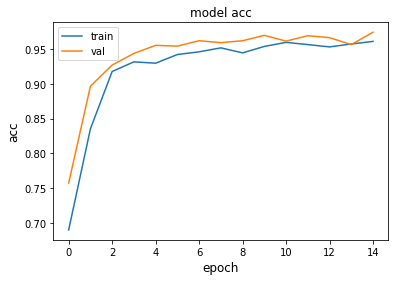

In [ ]:
import matplotlib.pyplot as plt
metric = "acc"
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.savefig('destination_path.eps', format='eps')
plt.show()

plt.close()


In [ ]:
scores = list()
XTest = XTest[:2200,:]
YTest = YTest[:2200,:]
print(YTest.shape)
for r in range(10):
  # p = np.random.permutation(Classes.shape[0])


  # Classes = Classes[p]
  # Traces = Traces[p]
  # p = np.random.permutation(Classes.shape[0])
  # YTest = YTest[p]
  # XTest = XTest[p]
	test_loss, test_acc = model.evaluate(XTest, YTest, batch_size=100, verbose=1)
	score = test_acc * 100.0
	print('>#%d: %.3f' % (r+1, score))
	scores.append(score)
  


# p = np.random.permutation(Classes.shape[0])


# Classes = Classes[p]
# Traces = Traces[p]
# Traces_deriv = Traces_deriv[p]
# print(Traces)

(2154, 1)
12/22 [===============>..............] - ETA: 10s - loss: 0.1048 - acc: 0.9650

KeyboardInterrupt: ignored

## Load Experimental Data

In [ ]:
Real_Data = matlab.loadmat('drive/MyDrive/NN_Data/Real_Experimental_Data/Real_Traces.mat')
Real_Classes = Real_Data['Classes']
Real_derivat = Real_Data['derivat']
Real_Traces = Real_Data['Traces']
Min_Real_Traces = np.min(Real_Traces,1)
Real_Traces = Real_Traces / Min_Real_Traces[:,None]

print(np.sum(Real_Classes==2))
print(np.sum(Real_Classes!=2))
print(Real_Classes.shape)
#print(Real_Classes[0,0] == 4)
#print(Real_Traces)

242
78
(320, 1)


## Preprocessing of Experimental Data labels

In [ ]:
# Run once
print(Real_Classes.shape)
for i in range(Real_Classes.shape[0]):
  
  if Real_Classes[i,0] == 2:
    Real_Classes[i,0] = 0
  else:
    Real_Classes[i,0] = 1

Real_Classes = np.round(Real_Classes)
print(np.sum(Real_Classes==0))

(320, 1)
242


In [ ]:
print(np.sum(Real_Classes==0))
print(np.sum(Real_Classes==1))

242
78


## Combine the data in a 3D matrix as LSTM model requires

In [ ]:
Combo_Real = np.zeros((Real_Traces.shape[0],Real_Traces.shape[1],2))
print(Combo_Real.shape)
Combo_Real[:,:,0] = Real_derivat
Combo_Real[:,:,1] = Real_Traces

(320, 900, 2)


In [ ]:
Real_derivat = Real_derivat.reshape(Real_Traces.shape[0],Real_Traces.shape[1],1)
test_loss, test_acc = model.evaluate(Real_Traces, Real_Classes, batch_size=100, verbose=1)
print("Test accuracy", test_acc)
print("Test loss", test_loss)

4/4 [==============================] - 5s 1s/step - loss: 0.6417 - acc: 0.7563
Test accuracy 0.7562500238418579
Test loss 0.6417109370231628


## Predict the labels by running the model and round the results

In [ ]:
predictResult = model.predict(Real_Traces)

In [ ]:
print(np.round(predictResult))

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.

In [ ]:
import math
Combo_Real2 = Combo_Real.copy()
data = np.squeeze(Combo_Real[:,:,0])
#for i in range(data.shape[0]):
 # data[i,0] == math.pow(data[i,0],0.5)

Combo_Real2[:,:,0] = data*11
yhat = model.predict(Combo_Real2)
#yhat = model.evaluate(Combo_Real2)

test_loss, test_acc = model.evaluate(Combo_Real2, Real_Classes, batch_size=100, verbose=1)
print("Test accuracy", test_acc)
print("Test loss", test_loss)
print(np.sum(np.round(yhat)))
#print(yhat)

4/4 [==============================] - 2s 389ms/step - loss: 1.3060 - acc: 0.5250
Test accuracy 0.5249999761581421
Test loss 1.3060194253921509
190.0


In [ ]:
#print(np.sum(np.round(yhat)))
#print(np.sum(np.round(Real_Classes)))
#print(np.round(yhat[:5]))
#print("aa")
#print(np.round(Real_Classes[:5]))
mask = np.round(Real_Classes) == 1
print(np.sum(mask))
print(np.sum(np.round(Real_Classes[mask])==np.round(yhat[mask])))
mask = np.round(Real_Classes) == 0
print(np.sum(mask))
print(np.sum(np.round(Real_Classes[mask])==np.round(yhat[mask])))
print(np.sum(np.round(yhat)))

78
58
242
110
190.0


[1.]


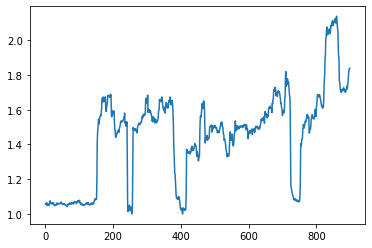

In [ ]:
import matplotlib.pyplot as plt
metric = "acc"
plt.figure()
n=20
plt.plot(Combo_Real[n,:,1])
print(Real_Classes[n])

In [ ]:
#print(np.sum(yhat))
#print(yhat)
yhat = np.round(yhat)
print(Real_Classes[:5,0])
#print(yhat)
print(np.sum(yhat))

[1. 1. 0. 0. 0.]
190.0


In [ ]:
test_loss, test_acc = model.evaluate(Combo_Real, Real_Classes, batch_size=100, verbose=1)
print("Test accuracy", test_acc)
print("Test loss", test_loss)

4/4 [==============================] - 2s 408ms/step - loss: 3.1283 - acc: 0.7563
Test accuracy 0.7562500238418579
Test loss 3.1283023357391357


## Testing Data with 900 Frames (new simulations to check prformance in a different simulated set)


In [ ]:
Classes = scipy.io.loadmat('drive/MyDrive/Simul_0526_Test_binary_900Frames/classes.mat')
Classes = Classes['classes']
print(np.size(Classes))

Traces = matlab.loadmat('drive/MyDrive/Simul_0526_Test_binary_900Frames/traces_steps.mat')
Traces = Traces['traces_steps']
Min_Traces = np.min(Traces,1)
Traces = Traces / Min_Traces[:,None]
print(Traces)
print(Traces.shape)

Traces_deriv = scipy.io.loadmat('drive/MyDrive/Simul_0526_Test_binary_900Frames/diff_CK_smooth.mat')
Traces_deriv = Traces_deriv['diff_CK_smooth'] 
print(Traces_deriv.shape)

FileNotFoundError: ignored

## Sliding Window

In [ ]:
## technique which can be used potentially for teh diviation of larger timseries to smaller ones in order to classify them with our current NN.
traces = []
sliding_window = 300;
overlap_steps = 300;
print(Traces.shape[1])
timesteps = Traces.shape[1]

print(timesteps)
print(Train_samples)

for i in range(Traces.shape[0]): 
  
  for j in range(0, timesteps, overlap_steps):
    
    traces.append(Traces[i,j:j+sliding_window])

traces = np.array(traces)
# traces = traces.reshape(traces.shape[0], traces.shape[1], 1)
print(traces.shape)

traces_deriv = []


print(timesteps)
print(Train_samples)

for i in range(Traces.shape[0]): 
  
  for j in range(0, timesteps, overlap_steps):
    
    traces_deriv.append(Traces_deriv[i,j:j+sliding_window])

traces_deriv = np.array(traces_deriv)
# traces_deriv = traces_deriv.reshape(traces_deriv.shape[0], traces_deriv.shape[1], 1)

Combo_test = np.zeros((traces.shape[0],traces.shape[1],2))
print(Combo_test.shape)
Combo_test[:,:,0] = traces_deriv
Combo_test[:,:,1] = traces

In [ ]:
yhat = model.predict(Combo_test)

In [ ]:
yhat = np.round(yhat)
#print(np.round(yhat))
#print(yhat.shape)
print(np.sum(yhat))
print(np.sum(Real_Classes))
print(Real_Classes.shape)
#print(yhat==Real_Classes)
#print(Real_Classes == 1)
print(Real_Classes[0,0])

In [ ]:
Classes_test = np.zeros(Classes.shape[0])
print(Classes_test.shape)
i=0
while i < Classes.shape[0]:
  print(yhat[i])
  i+1
#   print(yhat[i],yhat[i+1],yhat[i+2])
#   Classes_test[i] = yhat[i] + yhat[i+1] + yhat[i+2]
#   print(Classes_test)
# print(np.round(Classes_test))
  

In [ ]:
def evaluate_model(trainX, trainy, testX, testy):
	verbose, epochs, batch_size = 0, 15, 64
	n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]
  
	model = Sequential()
  model.add(LSTM(900, input_shape=(n_timesteps,n_features)))
  model.add(Dropout(0.5))
  model.add(Dense(800, activation='relu'))
  model.add(Dense(3, activation='softmax'))
  model.summary()
  model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics = ['acc'])
  
	# fit network
	model.fit(trainX, trainy, epochs=epochs, batch_size=batch_size, verbose=verbose)
	# evaluate model
	_, accuracy = model.evaluate(testX, testy, batch_size=batch_size, verbose=0)
	return accuracy

In [ ]:
scores = list()
for r in range(repeats):
	score = evaluate_model(trainX, trainy, testX, testy)
	score = score * 100.0
	print('>#%d: %.3f' % (r+1, score))
	scores.append(score)

In [ ]:
# summarize scores
def summarize_results(scores):
	print(scores)
	m, s = mean(scores), std(scores)
	print('Accuracy: %.3f%% (+/-%.3f)' % (m, s))